In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
sepal_length = [i[0] for i in iris.data]
sepal_width = [i[1] for i in iris.data]
petal_length = [i[2] for i in iris.data]
petal_width = [i[3] for i in iris.data]
tr = iris.target
df = pd.DataFrame({"Sepal Length":sepal_length, "Sepal Width":sepal_width, "Petal Length":petal_length, "Petal Width":petal_width, "Species": tr})

In [5]:
df.head()

Sepal Length  Sepal Width  Petal Length  Petal Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [6]:
g = df.groupby("Species")

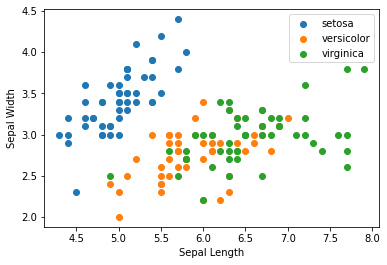

In [8]:
k = []
for key, items in g:
    plt.scatter(items['Sepal Length'], items['Sepal Width'])
    k.append(iris.target_names[key])
plt.legend(k)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

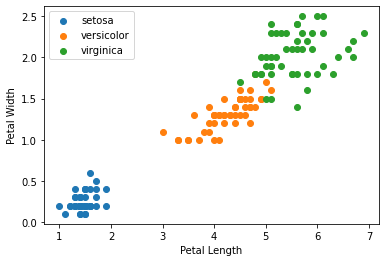

In [9]:
k = []
for key, items in g:
    plt.scatter(items['Petal Length'], items['Petal Width'])
    k.append(iris.target_names[key])
plt.legend(k)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [10]:
del df['Sepal Length']
del df['Sepal Width']
df.head()

Petal Length  Petal Width  Species
0           1.4          0.2        0
1           1.4          0.2        0
2           1.3          0.2        0
3           1.5          0.2        0
4           1.4          0.2        0

In [11]:
X = df[['Petal Length','Petal Width']]
y = df['Species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [13]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [17]:
clf1 = svm.SVC(kernel = 'sigmoid')
clf1.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [18]:
y_pred = clf1.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0 16]
 [ 0  0 18]
 [ 6  0  5]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        18
           2       0.13      0.45      0.20        11

    accuracy                           0.11        45
   macro avg       0.04      0.15      0.07        45
weighted avg       0.03      0.11      0.05        45



As we can see with the graphs plotted above, the Petal Width and Petal Length is linear seperable with respect to the Species. Therefore the SVC with linear kernel gives us a very high accuracy as it correctly classifies the data. However the sigmoid kernel gives a very bad result.

In [32]:
df=pd.read_csv('boston.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [33]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [34]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [38]:
X = df.drop("MEDV",1) #Feature Matrix
y = df['MEDV'] #Target

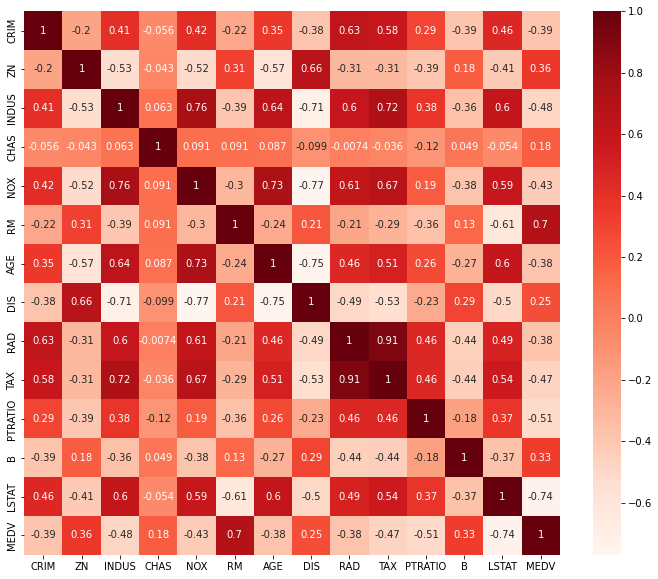

In [41]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
fitted=regressor.fit(X_train, y_train)
y_predict_train=fitted.predict(X_train)
y_predict_test=fitted.predict(X_test)

In [46]:
fitted.score(X_train,y_train)

0.7364551233338004

In [55]:
svr_rbf = SVR(kernel='rbf')
clf=regressor.fit(X_train, y_train)
y_predict_train=clf.predict(X_train)
y_predict_test=clf.predict(X_test)

In [56]:
clf.score(X_train,y_train)

0.7364551233338004

There is no difference when it comes to using different kernels for SVR with this particular dataset.